# CMF Rateslib Project

## 3 Sub-Projects:
    - Rates Models
    - FI Products
    - Curve Building
  


### Conventions
 - 1 year == 1.0
 - 1 month == 1/12
 - 1 day == 1/252
 - 0.02 == 2%

In [1]:
import numpy as np
dt = 1/252
dW = np.random.randn()*dt
# Mean that dW is 1 day increment with unit annual vol

In [2]:
cmf_rateslib_root = '../'
import sys
if cmf_rateslib_root not in sys.path:
    sys.path.append(cmf_rateslib_root)

# Curves

In [3]:
from cmf_rateslib.curves.base_curve import BaseZeroCurve

In [4]:
curve = BaseZeroCurve([0,2,5,10], [0.01, 0.02, 0.03, 0.03])

In [5]:
curve.df(0.15)

0.9983887993796147

In [6]:
curve.zero_rate(4.5)

0.028333333333333332

In [7]:
curve.fwd_rate(1, 1.5)

-0.026111111111111127

In [8]:
curve.bump?

In [9]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


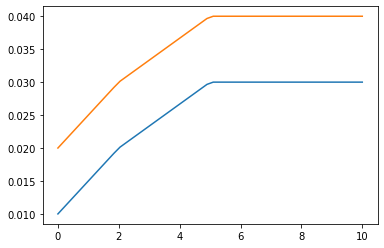

In [10]:
t = np.linspace(0, 10)
plot(t, curve.zero_rate(t), t, curve.bump(0.01).zero_rate(t))

In [11]:
spread_curve = BaseZeroCurve([0, 5, 10], [0.001, 0.002, 0.003])

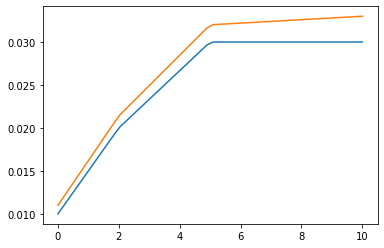

In [12]:
t = np.linspace(0, 10)
new_curve = curve + spread_curve
plot(t, curve.zero_rate(t), t, new_curve.zero_rate(t))

# Products

In [13]:
from cmf_rateslib.products.base_product import BaseProduct

In [14]:
p = BaseProduct()

In [15]:
p.get_cashflows()

In [16]:
p.pv()

0

In [17]:
from cmf_rateslib.products.bonds import ZCBond

In [18]:
bond = ZCBond(expiry=9)

In [19]:
bond.get_cashflows()

(array([9]), array([1]))

In [20]:
bond.pv(0, curve + spread_curve)

0.7443826960380553

# Rates Models

 Simple PCA curve Generator
 
 $n$ zero rates and $m$ factors
 $$
     dZ = U dX
 $$
 
 $$
 dX_i = \sigma_i dW_i 
 $$
 
 Mean Reverting PCA curve Generator
 
 Same as abobe, but:
 $$
 dX_i = (\theta_i - X)dt + \sigma_i dW_i 
 $$

In [21]:
from cmf_rateslib.rates.simple_pca import SimplePCAModel

In [22]:
model = SimplePCAModel(
    maturities=[0, 2, 5, 10],
    maturity_loadings=np.array([
        [1,1,1,1],
        [0,1,2,3],
        [2,1,1,2]]).T,
        factor_vols=[0.01, 0.005, 0.001])

In [23]:
evolved_curves = model.evolve_zero_curve(curve, 5, 1/252)

In [24]:
import matplotlib.pyplot as plt 

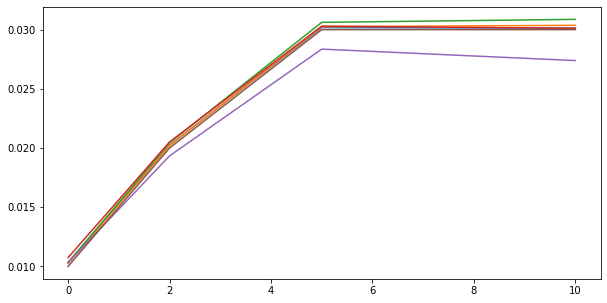

In [25]:
fig = plt.figure(figsize=(10, 5))
for ev_curve in evolved_curves:
    plt.plot(curve._maturities, ev_curve._rates)
plt.plot(curve._maturities, curve._rates)

In [26]:
generated_curves = model.create_new(10)

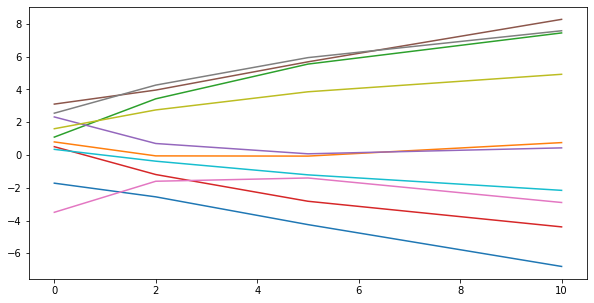

In [27]:
fig = plt.figure(figsize=(10, 5))
for gen_curve in generated_curves:
    plt.plot(gen_curve._maturities, gen_curve._rates)


In [28]:
print(model.fit(generated_curves).real)

[ 3.02949502e+01 -1.13377261e-15  2.00079295e+00  2.03023736e-15
  7.71632029e-16 -5.38529187e-16  2.58994790e-16  7.68695870e-17
 -4.55932536e-17  1.70375419e-17]


In [29]:
from cmf_rateslib.rates.mean_reverting_pca import MeanRevertingPCAModel

In [31]:
model2 = MeanRevertingPCAModel(
    maturities=[0, 2, 5, 10],
    maturity_loadings=np.array([
        [1,1,1,1],
        [0,1,2,3],
        [2,1,1,2]]).T,
        factor_vols=[0.01, 0.005, 0.001], theta_vol = 0.01)

In [33]:
evolved_curves_mr = model2.evolve_zero_curve([1, 1, 1], curve, 5, 1/252)

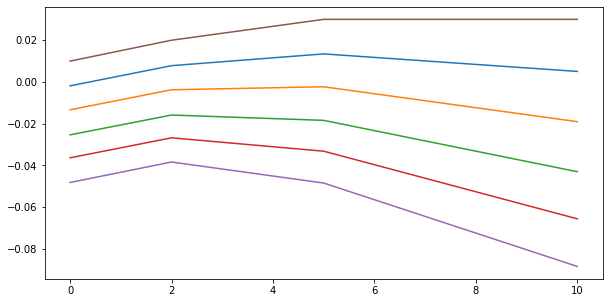

In [34]:
fig = plt.figure(figsize=(10, 5))
for ev_curve in evolved_curves_mr:
    plt.plot(curve._maturities, ev_curve._rates)
plt.plot(curve._maturities, curve._rates)